<p><img alt="logo" width="180" src="https://dl.dropboxusercontent.com/s/nm3k2p6i3k6d6gl/sctensor.png" align="left" /></p>


<h1>Exercise2: scTensorのデモ</h1>


XXX

In [1]:
# パッケージインストール
install.packages(c("BiocManager", "IRdisplay"), repos="http://cran.r-project.org")
BiocManager::install(c("SingleCellExperiment", "LRBase.Hsa.eg.db", "MeSH.Hsa.eg.db"), suppressUpdates=TRUE)
remotes::install_github("rikenbit/scTensor")

# パッケージロード
library("scTensor")
library("SingleCellExperiment")
library("LRBase.Hsa.eg.db")
library("MeSH.Hsa.eg.db")
library("IRdisplay")


The downloaded binary packages are in
	/var/folders/k0/tk8gl4bj2_v2mbjx80ydsznw0000gn/T//RtmpZ6kjbO/downloaded_packages


Bioconductor version 3.9 (BiocManager 1.30.10), R 3.6.1 (2019-07-05)
Installing package(s) 'SingleCellExperiment', 'LRBase.Hsa.eg.db',
  'MeSH.Hsa.eg.db'



The downloaded binary packages are in
	/var/folders/k0/tk8gl4bj2_v2mbjx80ydsznw0000gn/T//RtmpZ6kjbO/downloaded_packages


installing the source packages ‘LRBase.Hsa.eg.db’, ‘MeSH.Hsa.eg.db’

Old packages: 'bookdown', 'digest', 'future', 'rlang', 'roxygen2', 'webshot'


digest   (0.6.22 -> 0.6.23) [CRAN]
rlang    (0.4.1  -> 0.4.2 ) [CRAN]
webshot  (0.5.1  -> 0.5.2 ) [CRAN]
bookdown (0.15   -> 0.16  ) [CRAN]


Installing 4 packages: digest, rlang, webshot, bookdown



The downloaded binary packages are in
	/var/folders/k0/tk8gl4bj2_v2mbjx80ydsznw0000gn/T//RtmpZ6kjbO/downloaded_packages
✔  checking for file ‘/private/var/folders/k0/tk8gl4bj2_v2mbjx80ydsznw0000gn/T/RtmpZ6kjbO/remotes4f643f2baec2/rikenbit-scTensor-be3bf19/DESCRIPTION’
─  preparing ‘scTensor’:
✔  checking DESCRIPTION meta-information
─  installing the package to process help pages
─  saving partial Rd database (45.1s)
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘scTensor_1.2.1.tar.gz’
   


Registered S3 method overwritten by 'seriation':
  method         from 
  reorder.hclust gclus


Registered S3 method overwritten by 'enrichplot':
  method               from
  fortify.enrichResult DOSE
Loading required package: SummarizedExperiment
Loading required package: GenomicRanges
Loading required package: stats4
Loading required package: BiocGenerics
Loading required package: parallel

Attaching package: 'BiocGenerics'

The following objects are masked from 'package:parallel':

    clusterApply, clusterApplyLB, clusterCall, clusterEvalQ,
    clusterExport, clusterMap, parApply, parCapply, parLapply,
    parLapplyLB, parRapply, parSapply, parSapplyLB

The following objects are masked from 'package:stats':

    IQR, mad, sd, var, xtabs

The following objects are masked from 'package:base':

    Filter, Find, Map, Position, Reduce, anyDuplicated, append,
    as.data.frame, basename, cbind, colnames, dirname, do.call,
    duplicated, eval, evalq, get, grep, grepl, intersect, is.un

In [2]:
data(GermMale) # 発現量行列
data(labelGermMale) # 細胞型ラベル
data(tsneGermMale) # t-SNEの二次元座標

In [3]:
sce <- SingleCellExperiment(assays=list(counts = GermMale))
reducedDims(sce) <- SimpleList(TSNE=tsneGermMale$Y)

In [4]:
CPMED <- function(input){
    libsize <- colSums(input)
    median(libsize) * t(t(input) / libsize)
}

In [5]:
normcounts(sce) <- log10(CPMED(counts(sce)) + 1)

In [6]:
cellCellSetting(sce, LRBase.Hsa.eg.db, labelGermMale, names(labelGermMale))

In [7]:
rks <- cellCellRanks(sce, assayNames="normcounts")

In [8]:
cellCellDecomp(sce, ranks=rks$selected, assayNames="normcounts")

Input data matrix may contains 7 gene symbols because the name contains some alphabets.
scTensor uses only NCBI Gene IDs for now.
Here, the gene symbols are removed and remaining 235 NCBI Gene IDs are used for scTensor next step.
7 * 7 * 84 Tensor is created


snapshotDate(): 2019-05-02
downloading 0 resources
loading from cache 
    'AH70572 : 77318'
Loading required package: AnnotationDbi
Related gene names are retrieved from AnnotationHub...
'select()' returned 1:1 mapping between keys and columns
Related gene descriptions are retrieved from AnnotationHub...
'select()' returned 1:1 mapping between keys and columns
Related GO IDs are retrieved from AnnotationHub...
'select()' returned 1:many mapping between keys and columns
Related Ensembl Gene IDs are retrieved from AnnotationHub...
'select()' returned 1:many mapping between keys and columns
Related Ensembl Protein IDs are retrieved from AnnotationHub...
'select()' returned 1:many mapping between keys and columns
Related UniProtKB IDs are retrieved from AnnotationHub...
'select()' returned 1:many mapping between keys and columns
Related MeSH IDs are retrieved from MeSH.XXX.eg.db-type package...
Related Reactome IDs are retrieved from reactome.db package...
2 LR vectors will be calculated 

GO-Enrichment Analysis is running...(1/3)


Loading required package: org.Hs.eg.db


GO-Enrichment Analysis is running...(2/3)
GO-Enrichment Analysis is running...(3/3)
Hyper-links are embedded...
GO-Enrichment Analysis is running...(1/3)
GO-Enrichment Analysis is running...(2/3)
GO-Enrichment Analysis is running...(3/3)
Hyper-links are embedded...


ligand.Rmd is created...
receptor.Rmd is created...
ligand_all.Rmd is created...
receptor_all.Rmd is created...
ligand.Rmd is compiled to ligand.html...
ligand_all.Rmd is compiled to ligand_all.html...
receptor.Rmd is compiled to receptor.html...
receptor_all.Rmd is compiled to receptor_all.html...
2 pattern_X_Y.Rmd files are compiled to pattern_X_Y.html :



pattern_4_1.Rmd is created...


pattern_4_1.Rmd is compiled to pattern_4_1.html



pattern_4_3.Rmd is created...


pattern_4_3.Rmd is compiled to pattern_4_3.html
index.Rmd is created...
index.Rmd is compiled to index.html...
################################################
Data files are saved in
/var/folders/k0/tk8gl4bj2_v2mbjx80ydsznw0000gn/T//RtmpZ6kjbO
################################################



<!DOCTYPE html>

 

 

 
 
 
 


 


 Cell-cell interaction within Germline_Male, GSE86146
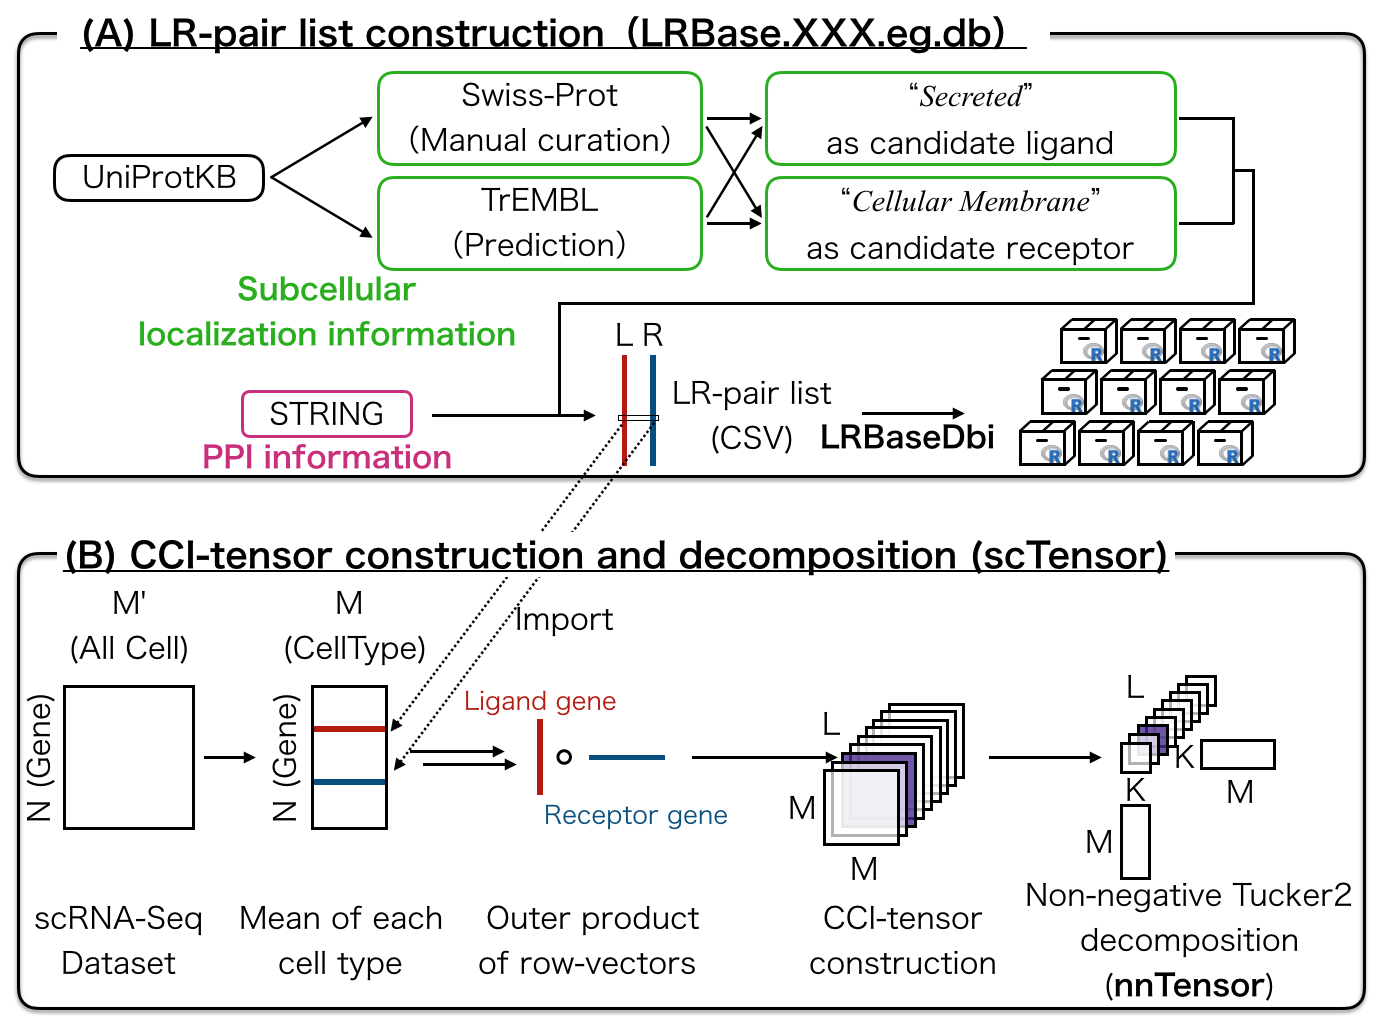
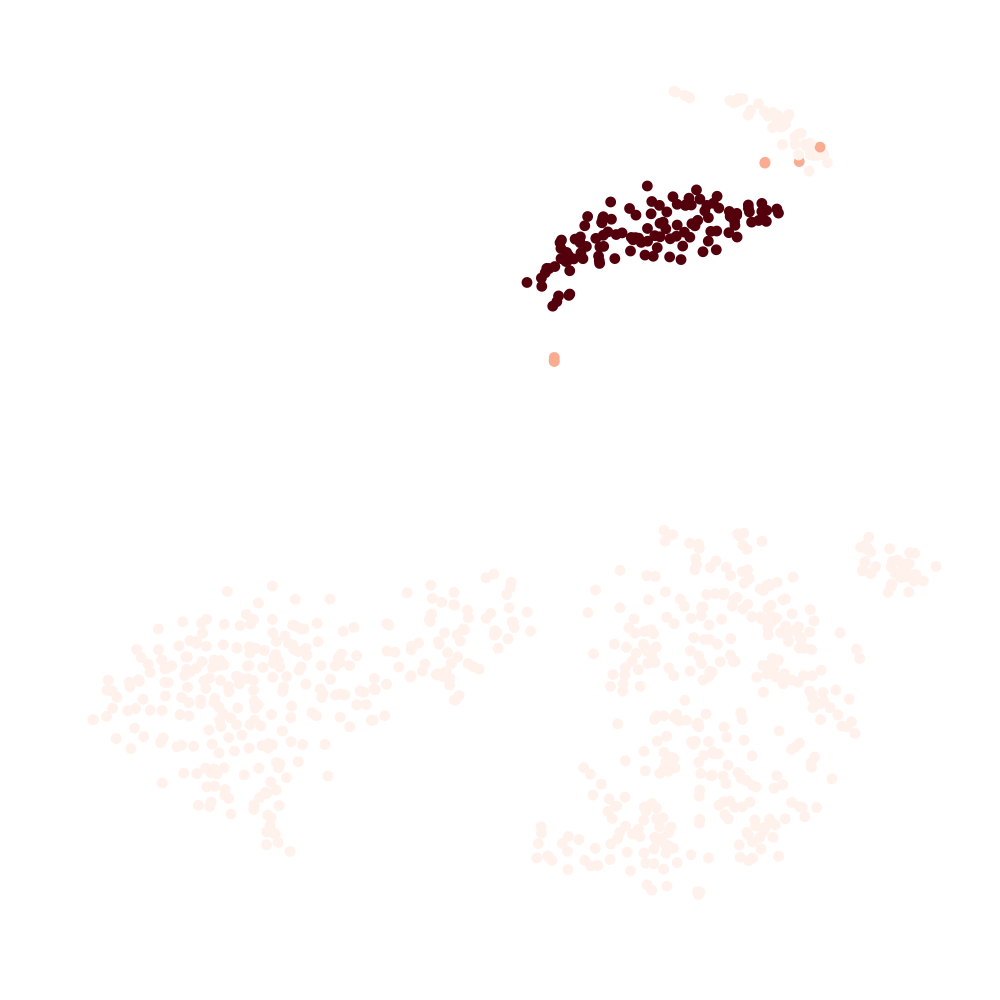
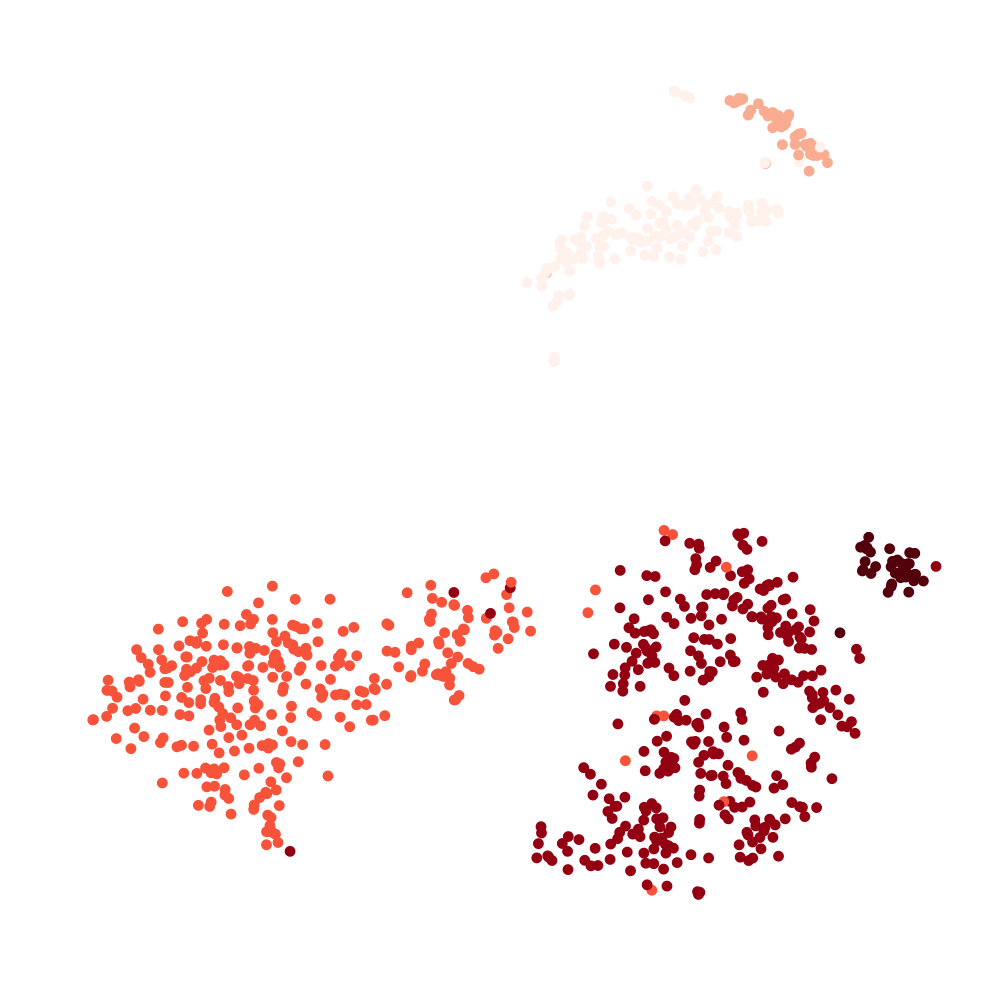
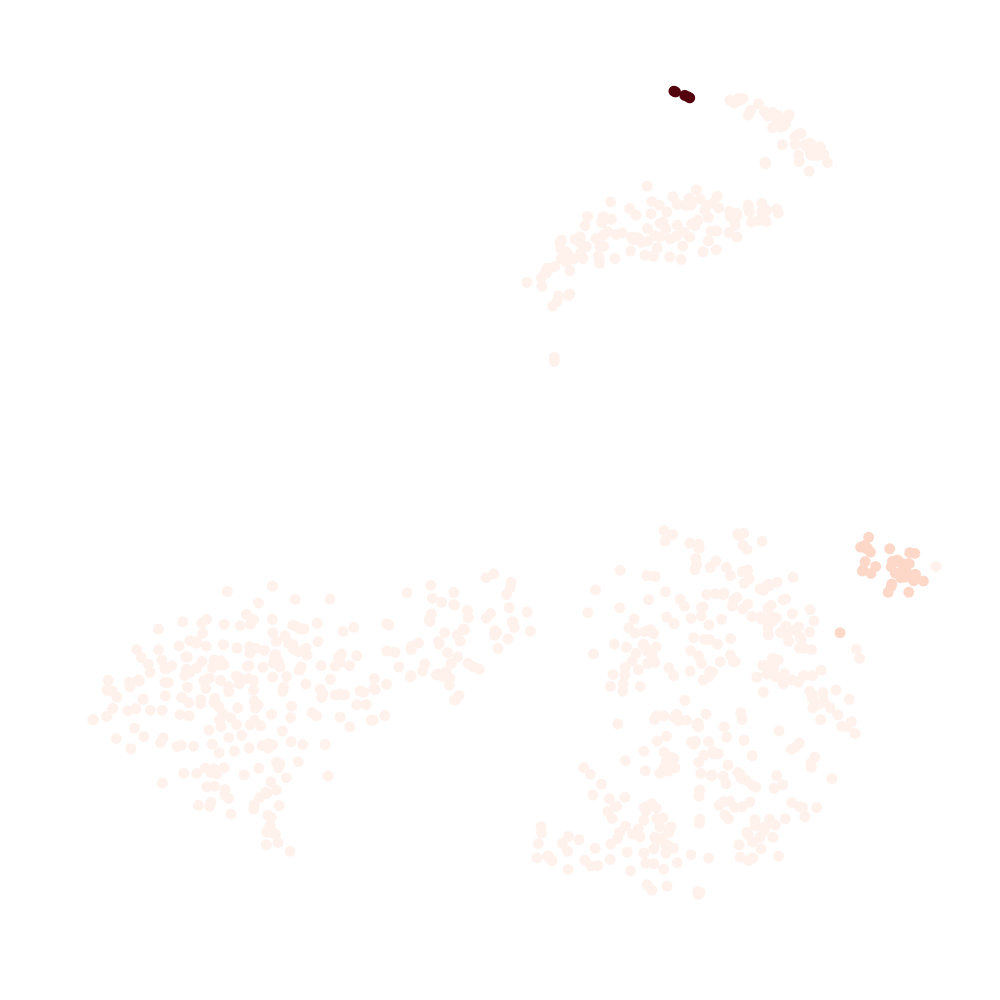
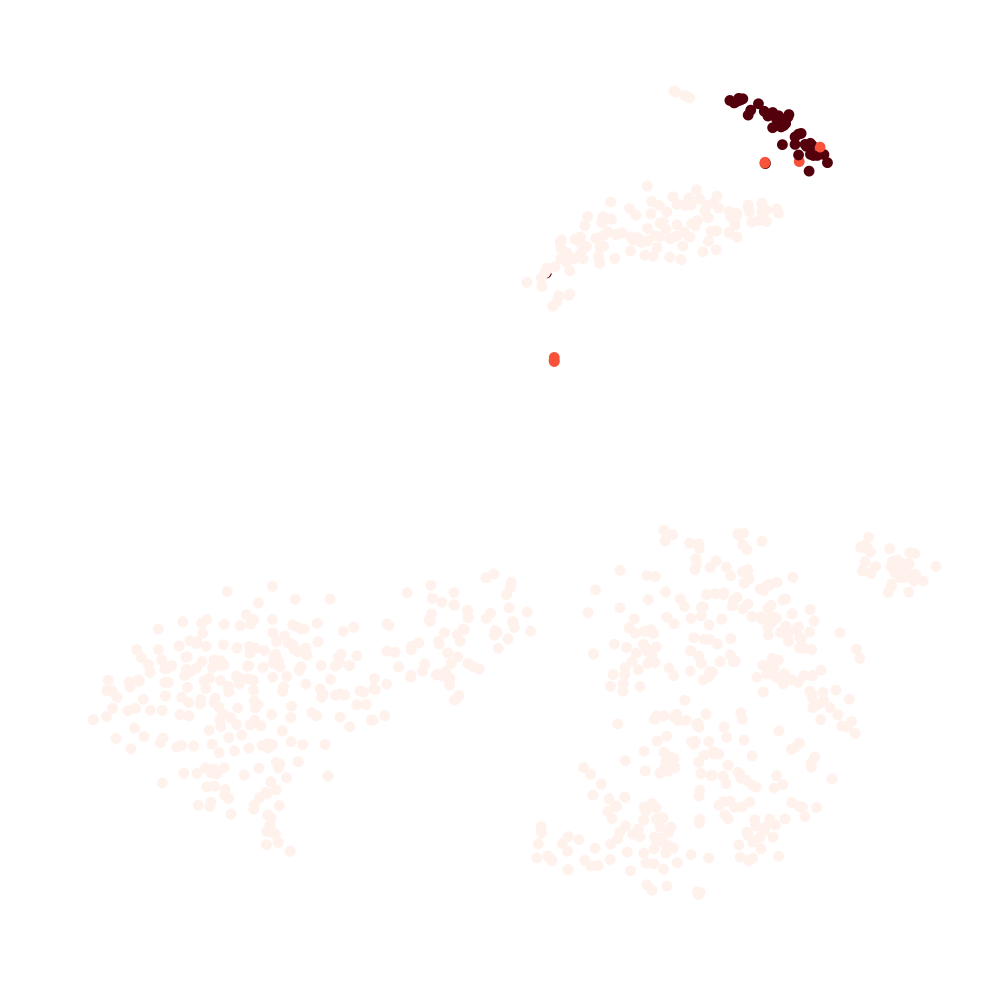
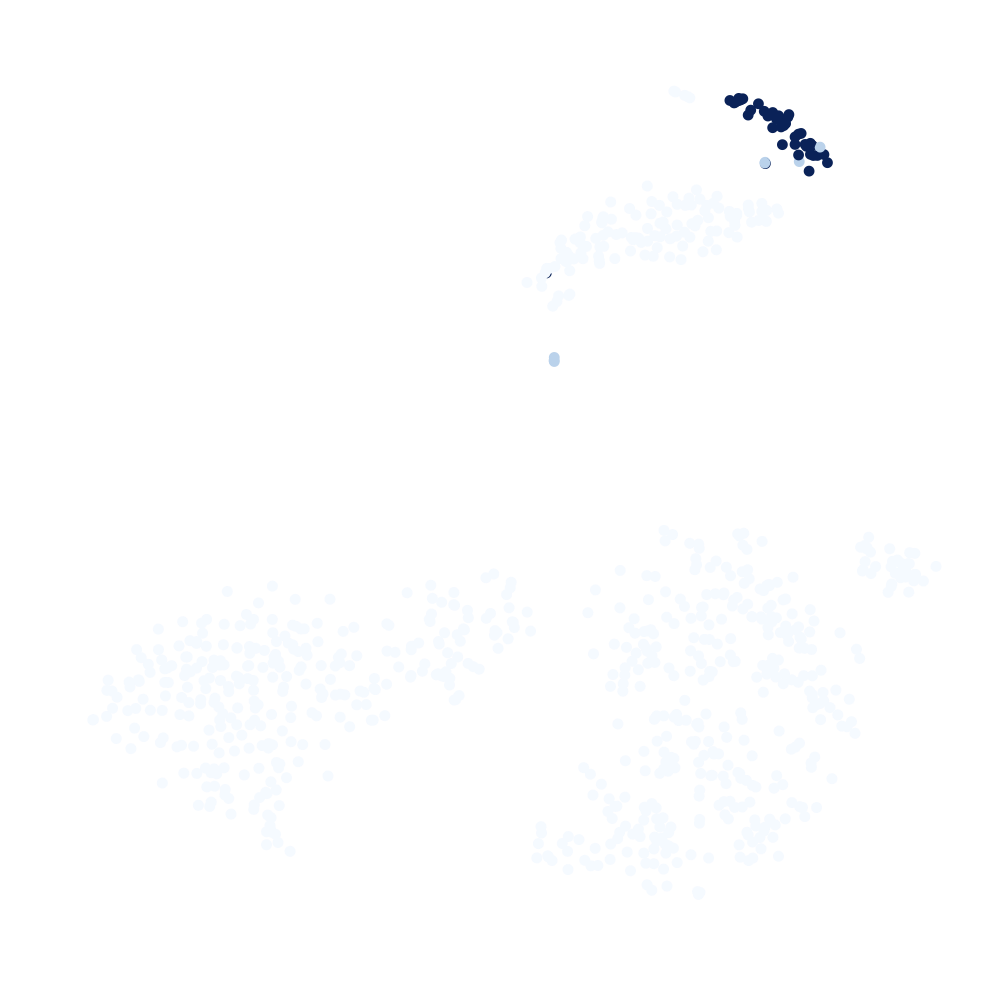
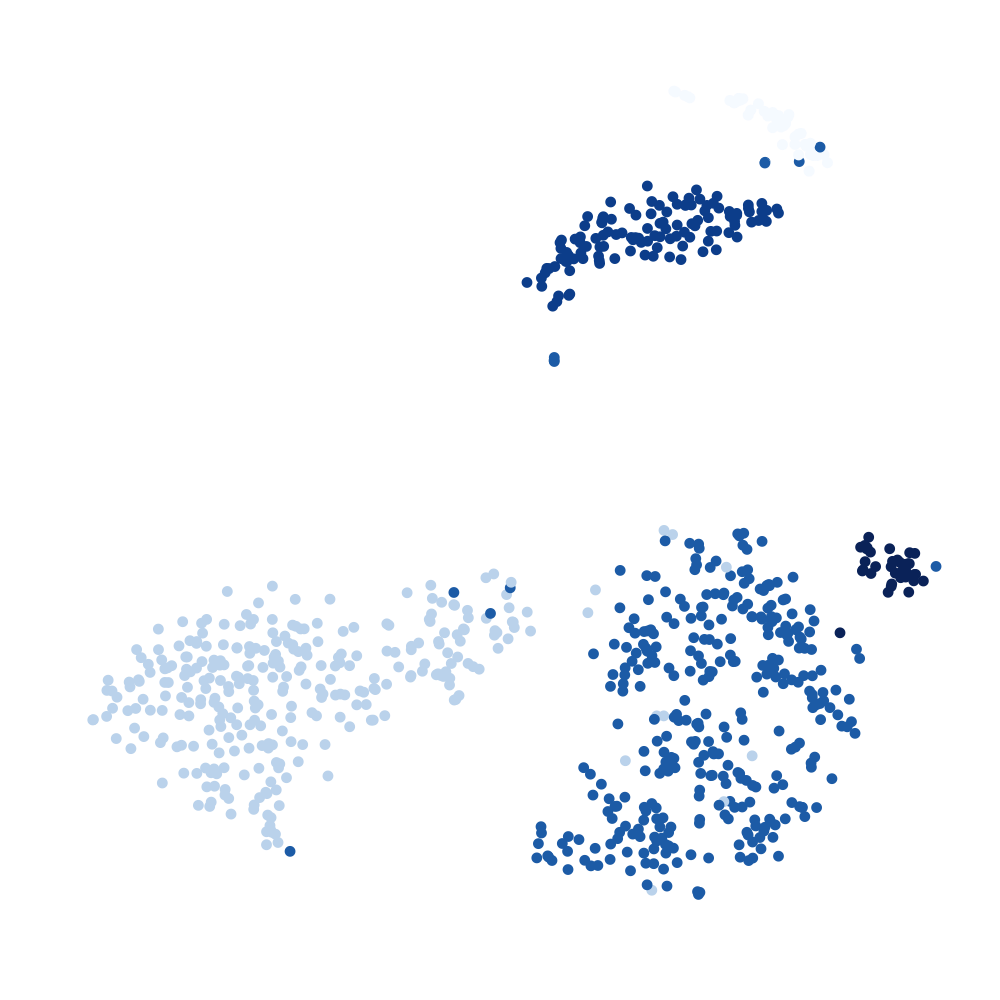
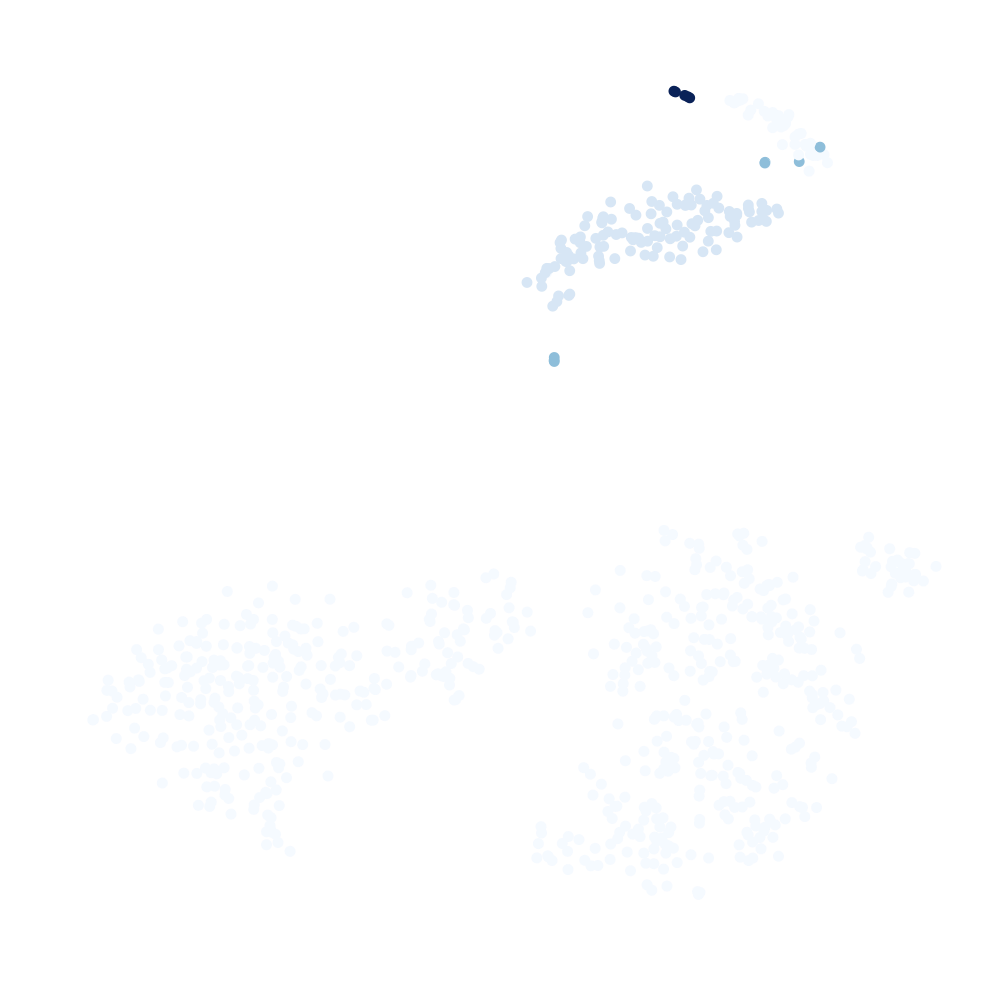
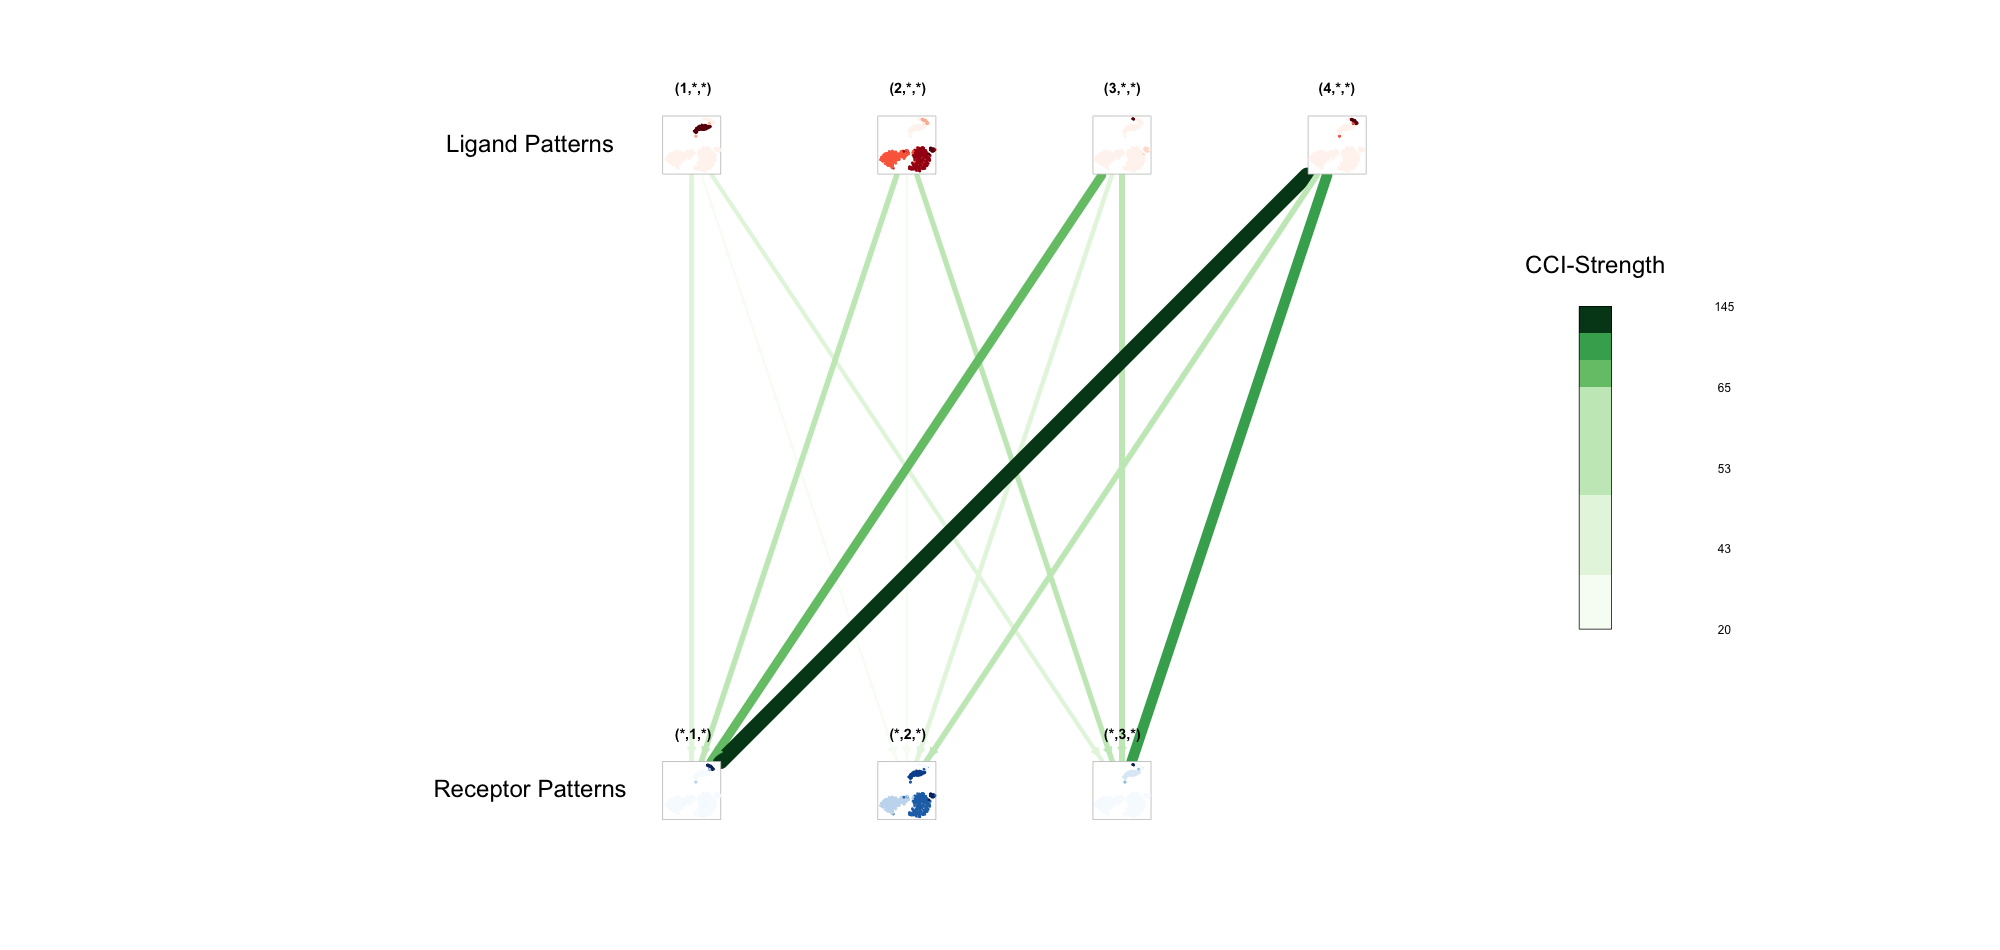

In [9]:
d <- tempdir()
cellCellReport(sce, reducedDimNames="TSNE", assayNames="normcounts",
    title="Cell-cell interaction within Germline_Male, GSE86146",
    author="Koki Tsuyuzaki", html.open=FALSE, upper=2, out.dir=d,
    goenrich=TRUE, meshenrich=FALSE, reactomeenrich=FALSE,
    doenrich=FALSE, ncgenrich=FALSE, dgnenrich=FALSE)
display_html(file=paste0(d, "/index.html"))

In [10]:
sessionInfo()

R version 3.6.1 (2019-07-05)
Platform: x86_64-apple-darwin15.6.0 (64-bit)
Running under: macOS Catalina 10.15.1

Matrix products: default
BLAS:   /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRblas.0.dylib
LAPACK: /Library/Frameworks/R.framework/Versions/3.6/Resources/lib/libRlapack.dylib

locale:
[1] C/UTF-8/C/C/C/C

attached base packages:
[1] parallel  stats4    stats     graphics  grDevices utils     datasets 
[8] methods   base     

other attached packages:
 [1] heatmaply_0.16.0            viridis_0.5.1              
 [3] viridisLite_0.3.0           BiocStyle_2.12.0           
 [5] plotly_4.9.1                ggplot2_3.2.1              
 [7] GO.db_3.8.2                 org.Hs.eg.db_3.8.2         
 [9] AnnotationDbi_1.46.1        IRdisplay_0.7.0            
[11] MeSH.Hsa.eg.db_1.12.0       MeSHDbi_1.20.0             
[13] LRBase.Hsa.eg.db_1.1.0      LRBaseDbi_1.2.0            
[15] SingleCellExperiment_1.6.0  SummarizedExperiment_1.14.1
[17] DelayedArray_0.10.0    

Colaboratory ノートブックの操作について詳しくは、<a href="/notebooks/basic_features_overview.ipynb">Colaboratory の概要</a>をご覧ください。